In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
database = pd.read_csv('database/airbnb.csv')

In [53]:
duplicated_rows = database.duplicated()
print(duplicated_rows.any())

False


In [54]:
database.columns

Index(['id', 'title', 'description', 'typeDescription', 'roomType',
       'discountedPrice', 'price', 'originalPrice', 'day5Price', 'url',
       'ratingValue', 'ratingReviewsCount', 'ratingGuestSatisfaction',
       'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy',
       'ratingLocation', 'hostID', 'hostName', 'hostAbout', 'hostRating',
       'hostIsSuper', 'hostTimeResponse', 'hostResponseRate', 'latitude',
       'longitude', 'highlights', 'highlightsHost', 'highlightsLocation',
       'origin'],
      dtype='object')

In [55]:
# Remover "R$" e converter colunas de pre√ßo para float
def convert_price(value):
    """Remove o s√≠mbolo 'R$' e converte para float"""
    return float(value.replace("R$", "").replace(",", "").strip()) if isinstance(value, str) else value

In [56]:
database['discountedPrice'] = database['discountedPrice'].apply(convert_price)
database['price'] = database['price'].apply(convert_price)
database['originalPrice'] = database['originalPrice'].apply(convert_price)
database['day5Price'] = database['day5Price'].apply(convert_price)

## 1. Mapeamento ##

In [57]:
import folium
from folium.plugins import MarkerCluster

In [58]:
# visualiza√ß√£o com base nas m√©dias das latitudes e longitudes
map_center_lat= database['latitude'].mean()
map_center_log= database['longitude'].mean()

#cria√ß√£o e atribui√ß√£o do mapa a vari√°vel map_stm
map_geral = folium.Map((map_center_lat, map_center_log), tiles="cartodb positron", control_scale=True,)
#(latitude,longitude)

In [59]:
marker_cluster = MarkerCluster().add_to(map_geral)

# iterrows() -> (ind√≠ce, linha)
for i, row in database.iterrows():
    try: 
        lat = row['latitude']
        lon = row['longitude']

        # verifica√ß√£o se os valores em lat e lon s√£o n√∫meros e se s√£o int ou float, caso seja avaliado como invalido ir√° pular (continue) a coordenada da linha
        if pd.isna(lat) or pd.isna(lon) or not (isinstance(lat, (int,float)) and isinstance(lon, (int, float))): 
            continue

        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    except (KeyError, TypeError) as e:
        print(f"Erro processando linha de index {i}:{e}")
        continue


In [60]:
map_geral

## 2. Avalia√ß√µes ##

In [61]:
origin_room_type_counts = database.groupby(['origin', 'roomType']).size().unstack(fill_value=0)
print("Quantidade de tipos de hospedagem por origem:")
print(origin_room_type_counts)

Quantidade de tipos de hospedagem por origem:
roomType  Entire home/apt  Private room  Shared room
origin                                              
blm                   277           130            6
stm                   306           141            6


### Correla√ß√£o entre Avalia√ß√µes e Pre√ßo ###

In [62]:
database.head(10)

id                                              title  \
0             23562655  Sofisticado Loft Mobiliado no Cora√ß√£o do Umarizal   
1   912967533767582954            bela vista, √≥tima localiza√ß√£o, conforto   
2  1253877901508012768  Quarto e cozinha bem localizado acesso individ...   
3  1005937618095866893                        Quarto com vista para o rio   
4  1310394345938397835       Su√≠te somente para voc√™ no bairro Marambaia.   
5             35282485                Quarto silencioso pr√≥ximo ao Bosque   
6  1327049905751092176                   Quarto com excelente localiza√ß√£o   
7             41744419  STUDIO 306 | WIFI 600MB | RESIDENCIAL JC, um l...   
8   791310251933878840                       Quarto na melhor localiza√ß√£o   
9   900596593790350889                     Espa√ßo Confort√°vel e Tranquilo   

                                         description  \
0  Sofisticado Loft de 52 m2, no cora√ß√£o do Bairr...   
1  AP 1/4 moderno, aconchegante, em local seguro ...   
2  Local privilegiado com entrada independente. O...   
3  O apartamento √© simples, mas arejado e ilumina...   
4  Uma su√≠te somente para voc√™ no bairro Marambai...   
5  Ambiente familiar calmo e aconchegante.O quart...   
6  Su√≠te ampla e aconchegante com entrada lateral...   
7  O apartamento 306 √© aconchegante, alinhado e o...   
8  Sejam bem-vindos! ü§ç LEIA A ABA REGRAS DA CASA ...   
9  Relaxe com toda a fam√≠lia nesta acomoda√ß√£o tra...   

                                     typeDescription         roomType  \
0              Espa√ßo inteiro: loft em Bel√©m, Brasil  Entire home/apt   
1       Espa√ßo inteiro: apartamento em Bel√©m, Brasil  Entire home/apt   
2              Espa√ßo inteiro: casa em Bel√©m, Brasil  Entire home/apt   
3                            Quarto em Bel√©m, Brasil     Private room   
4                         Microcasa em Bel√©m, Brasil  Entire home/apt   
5                            Quarto em Marco, Brasil     Private room   
6                            Quarto em Bel√©m, Brasil     Private room   
7       Espa√ßo inteiro: apartamento em Bel√©m, Brasil  Entire home/apt   
8                            Quarto em Bel√©m, Brasil     Private room   
9  Espa√ßo inteiro: apartamento em Ananindeua, Brasil  Entire home/apt   

   discountedPrice  price  originalPrice  day5Price  \
0              NaN  423.0            NaN       1.71   
1              NaN  518.0            NaN       2.06   
2              NaN  135.0            NaN     575.00   
3              NaN  135.0            NaN     530.00   
4             69.0   69.0           78.0     330.00   
5              NaN  119.0            NaN     505.00   
6              NaN  145.0            NaN     618.00   
7              NaN  201.0            NaN     995.00   
8             62.0   62.0           75.0     330.00   
9              NaN  173.0            NaN     675.00   

                                                 url  ...  hostRating  \
0  https://www.airbnb.com/rooms/23562655?locale=p...  ...        4.90   
1  https://www.airbnb.com/rooms/91296753376758295...  ...        4.96   
2  https://www.airbnb.com/rooms/12538779015080127...  ...        4.90   
3  https://www.airbnb.com/rooms/10059376180958668...  ...        4.93   
4  https://www.airbnb.com/rooms/13103943459383978...  ...        4.91   
5  https://www.airbnb.com/rooms/35282485?locale=p...  ...        4.90   
6  https://www.airbnb.com/rooms/13270499057510921...  ...        5.00   
7  https://www.airbnb.com/rooms/41744419?locale=p...  ...        4.93   
8  https://www.airbnb.com/rooms/79131025193387884...  ...        4.81   
9  https://www.airbnb.com/rooms/90059659379035088...  ...        4.92   

   hostIsSuper          hostTimeResponse        hostResponseRate  latitude  \
0         True    Responde em at√© 1 hora  Taxa de resposta: 100% -1.445973   
1         True    Responde em at√© 1 hora  Taxa de resposta: 100% -1.441200   
2         True    Responde em at√© 1 hora  Taxa de resposta: 100%

In [63]:
database['originalPrice'] = database['originalPrice'].fillna(database['price'])

In [64]:
database

id                                              title  \
0               23562655  Sofisticado Loft Mobiliado no Cora√ß√£o do Umarizal   
1     912967533767582954            bela vista, √≥tima localiza√ß√£o, conforto   
2    1253877901508012768  Quarto e cozinha bem localizado acesso individ...   
3    1005937618095866893                        Quarto com vista para o rio   
4    1310394345938397835       Su√≠te somente para voc√™ no bairro Marambaia.   
..                   ...                                                ...   
861  1328353590628975017            Alterlar Casa de Praia em Alter do Ch√£o   
862             45629422  Casa em Alter do Ch√£o no Centro acesso as praias.   
863  1091261682652318404                                        Su√≠te casal   
864  1198601539719395137                                     Sobrado Alter.   
865  1222330231873383648               Casa Primavera Fazenda O√°sis do Par√°   

                                           description  \
0    Sofisticado Loft de 52 m2, no cora√ß√£o do Bairr...   
1    AP 1/4 moderno, aconchegante, em local seguro ...   
2    Local privilegiado com entrada independente. O...   
3    O apartamento √© simples, mas arejado e ilumina...   
4    Uma su√≠te somente para voc√™ no bairro Marambai...   
..                                                 ...   
861  Op√ß√£o perfeita para voc√™ e sua fam√≠lia que que...   
862  - Garagem pra 3 carros;- Quarto 1 com uma cama...   
863  Este lugar cheio de estilo fica perto de desti...   
864  Abrace a natureza sem abrir m√£o do conforto e ...   
865  Reconecte-se √† natureza neste lugar inesquec√≠v...   

                                  typeDescription         roomType  \
0           Espa√ßo inteiro: loft em Bel√©m, Brasil  Entire home/apt   
1    Espa√ßo inteiro: apartamento em Bel√©m, Brasil  Entire home/apt   
2           Espa√ßo inteiro: casa em Bel√©m, Brasil  Entire home/apt   
3                         Quarto em Bel√©m, Brasil     Private room   
4                      Microcasa em Bel√©m, Brasil  Entire home/apt   
..                                            ...              ...   
861      Espa√ßo inteiro: casa em Santar√©m, Brasil  Entire home/apt   
862      Espa√ßo inteiro: casa em Santar√©m, Brasil  Entire home/apt   
863           Quarto em hotel em Santar√©m, Brasil     Private room   
864      Espa√ßo inteiro: casa em Santar√©m, Brasil  Entire home/apt   
865             Hotel-fazenda em Santar√©m, Brasil  Entire home/apt   

     discountedPrice    price  originalPrice  day5Price  \
0                NaN  423.000        423.000      1.710   
1                NaN  518.000        518.000      2.060   
2                NaN  135.000        135.000    575.000   
3                NaN  135.000        135.000    530.000   
4               69.0   69.000         78.000    330.000   
..               ...      ...            ...        ...   
861            843.0    1.023          1.023      4.500   
862              NaN      NaN            NaN      3.000   
863            348.0  421.000        421.000      1.830   
864              NaN      NaN            NaN      2.958   
865              NaN      NaN            NaN      1.963   

                                                   url  ...  hostRating  \
0    https://www.airbnb.com/rooms/23562655?locale=p...  ...        4.90   
1    https://www.airbnb.com/rooms/91296753376758295...  ...        4.96   
2    https://www.airbnb.com/rooms/12538779015080127...  ...        4.90   
3    https://www.airbnb.com/rooms/10059376180958668...  ...        4.93   
4    https://www.airbnb.com/rooms/13103943459383978...  ...        4.91   
..                                                 ...  ...         ...   
861  https://www.airbnb.com/rooms/13283535906289750...  ...        0.00   
862  https://www.airbnb.com/rooms/45629422?locale=p...  ...        4.89   
863  https://www.airbnb.com/rooms/10912616826523184...  ...        5.00   
864  https://www.airbnb.com/rooms/11

In [66]:
correlation_price = database[['discountedPrice', 'originalPrice', 'ratingValue']].corr()

print("Correla√ß√£o entre Pre√ßo e Avalia√ß√µes:")
print(correlation_price)

Correla√ß√£o entre Pre√ßo e Avalia√ß√µes:
                 discountedPrice  originalPrice  ratingValue
discountedPrice         1.000000       0.679777    -0.109781
originalPrice           0.679777       1.000000    -0.094315
ratingValue            -0.109781      -0.094315     1.000000


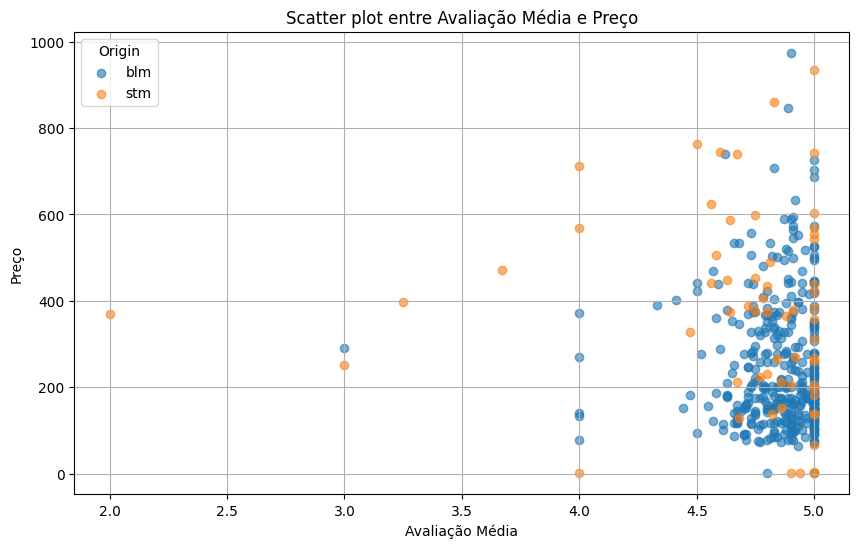

In [68]:
# Scatter plot entre ratingValue e originalPrice
plt.figure(figsize=(10, 6))
for origin in database['origin'].unique():
    subset = database[database['origin'] == origin]
    plt.scatter(subset['ratingValue'], subset['originalPrice'], label=origin, alpha=0.6)

plt.title('Scatter plot entre Avalia√ß√£o M√©dia e Pre√ßo')
plt.xlabel('Avalia√ß√£o M√©dia')
plt.ylabel('Pre√ßo')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

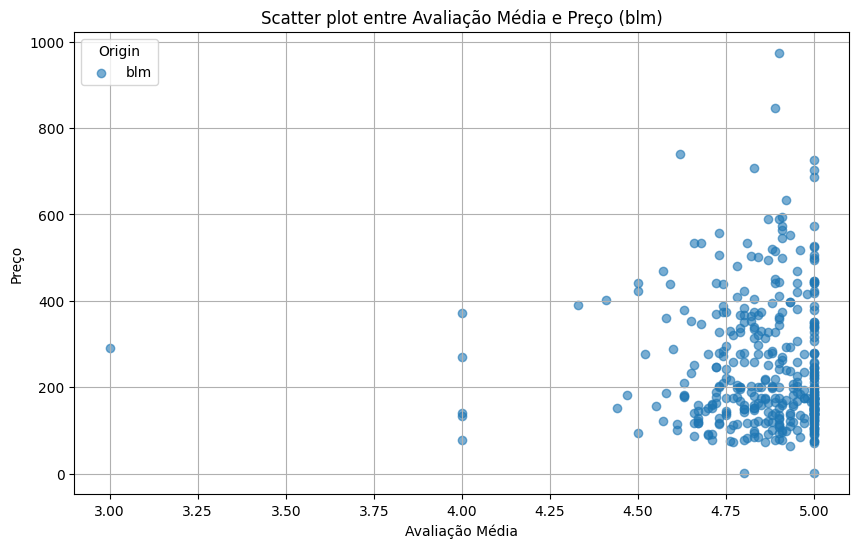

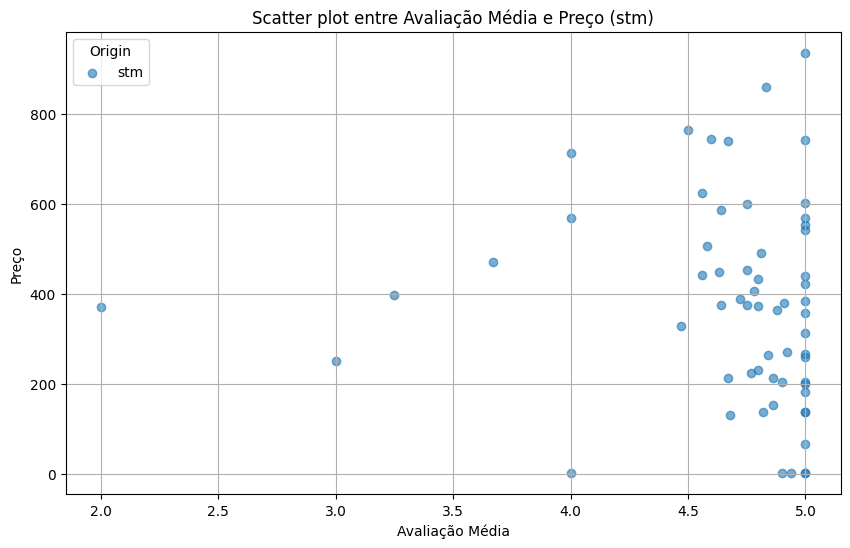

In [69]:
# Filtrar dados para origin == 'blm' e origin == 'stm'
blm_data = database[database['origin'] == 'blm']
stm_data = database[database['origin'] == 'stm']

# Gr√°fico de dispers√£o para origin == 'blm'
plt.figure(figsize=(10, 6))
plt.scatter(blm_data['ratingValue'], blm_data['originalPrice'], label='blm', alpha=0.6)
plt.title('Scatter plot entre Avalia√ß√£o M√©dia e Pre√ßo (blm)')
plt.xlabel('Avalia√ß√£o M√©dia')
plt.ylabel('Pre√ßo')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

# Gr√°fico de dispers√£o para origin == 'stm'
plt.figure(figsize=(10, 6))
plt.scatter(stm_data['ratingValue'], stm_data['originalPrice'], label='stm', alpha=0.6)
plt.title('Scatter plot entre Avalia√ß√£o M√©dia e Pre√ßo (stm)')
plt.xlabel('Avalia√ß√£o M√©dia')
plt.ylabel('Pre√ßo')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

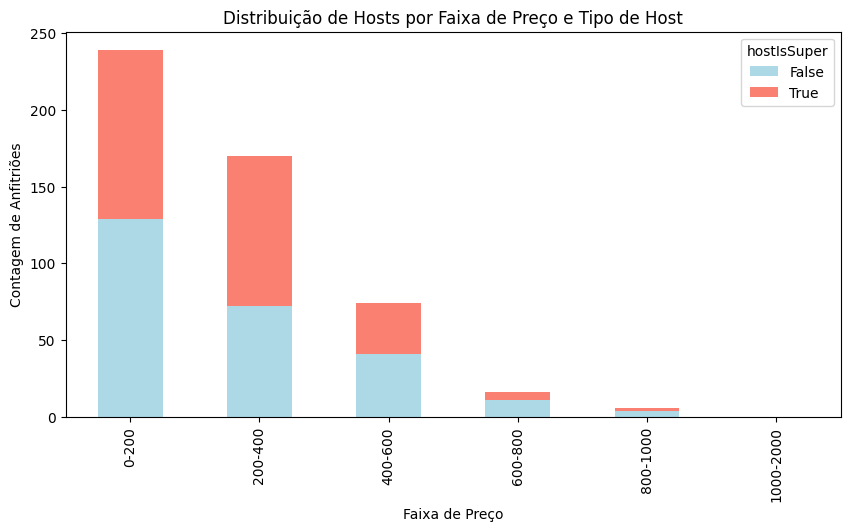

In [79]:
# Classificando as faixas de pre√ßo
database['priceCategory'] = pd.cut(database['originalPrice'], bins=[0, 200, 400, 600, 800, 1000, 2000], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-2000'])

# Gr√°fico de Barras Empilhadas
price_stack = database.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Pre√ßo')
plt.ylabel('Contagem de Anfitri√µes')
plt.title('Distribui√ß√£o de Hosts por Faixa de Pre√ßo e Tipo de Host')
plt.show()

## 3. Distribui√ß√£o dos Pre√ßos das Hospedagens ##

In [80]:
import statsmodels.api as sm

# Selecionar as colunas de caracter√≠sticas e a coluna alvo
X = database[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y = database.loc[X.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regress√£o linear m√∫ltipla
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          3.04e-186
Time:                        21:33:14   Log-Likelihood:                 296.18
No. Observations:                 726   AIC:                            -576.4
Df Residuals:                     718   BIC:                            -539.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

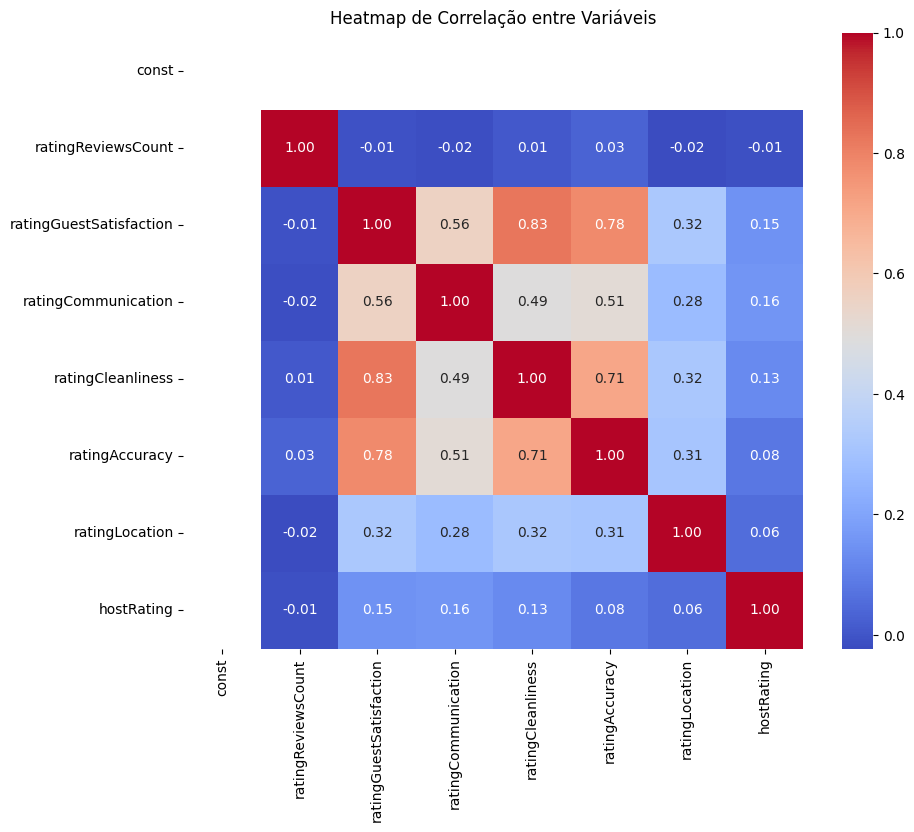

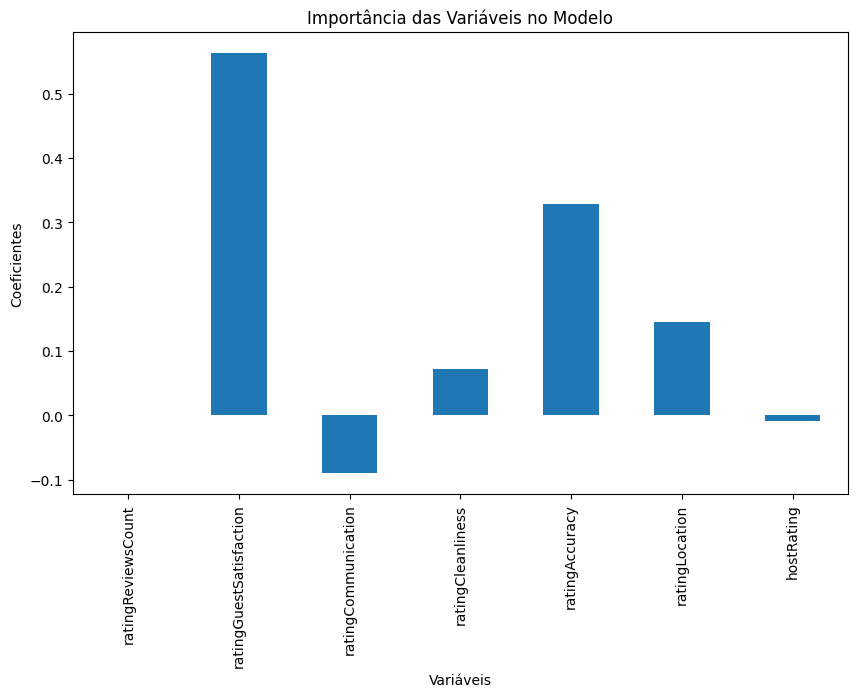

In [83]:
# 1. Correla√ß√£o entre as vari√°veis (heatmap)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correla√ß√£o entre Vari√°veis')
plt.show()

# 2. Import√¢ncia das vari√°veis no modelo (gr√°fico de barras)
coefficients = model.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Import√¢ncia das Vari√°veis no Modelo')
plt.xlabel('Vari√°veis')
plt.ylabel('Coeficientes')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          4.12e-102
Time:                        21:51:26   Log-Likelihood:                 94.519
No. Observations:                 346   AIC:                            -173.0
Df Residuals:                     338   BIC:                            -142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

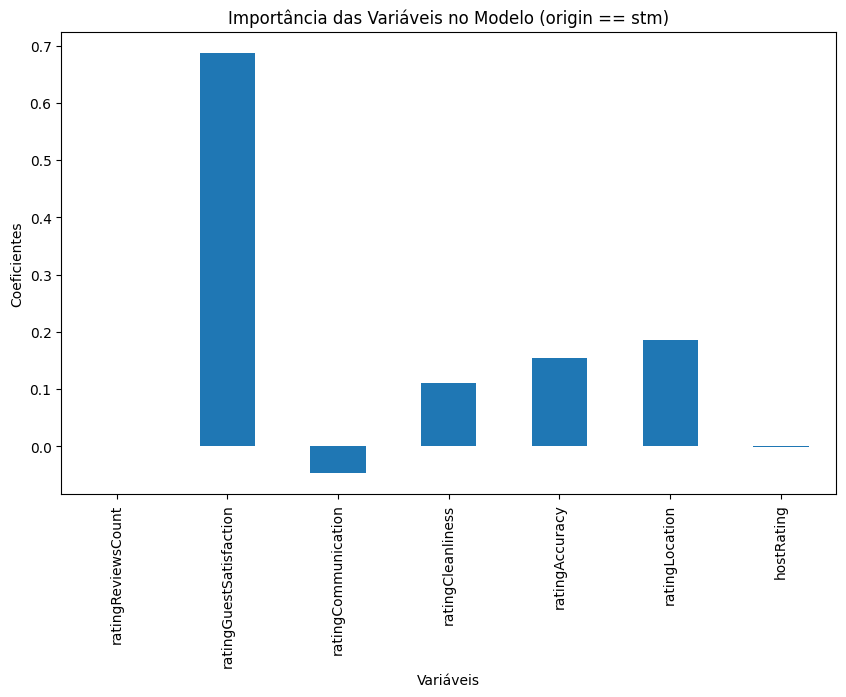

In [84]:
# Filtrar dados para origin == 'stm'
stm_data = database[database['origin'] == 'stm']

# Selecionar as colunas de caracter√≠sticas e a coluna alvo
X_stm = stm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_stm = stm_data.loc[X_stm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_stm = sm.add_constant(X_stm)

# Ajustar o modelo de regress√£o linear m√∫ltipla
model_stm = sm.OLS(y_stm, X_stm).fit()

# Exibir o resumo do modelo
print(model_stm.summary())

# Import√¢ncia das vari√°veis no modelo (gr√°fico de barras)
coefficients_stm = model_stm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_stm.plot(kind='bar')
plt.title('Import√¢ncia das Vari√°veis no Modelo (origin == stm)')
plt.xlabel('Vari√°veis')
plt.ylabel('Coeficientes')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     67.08
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.90e-62
Time:                        21:52:18   Log-Likelihood:                 249.89
No. Observations:                 380   AIC:                            -483.8
Df Residuals:                     372   BIC:                            -452.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

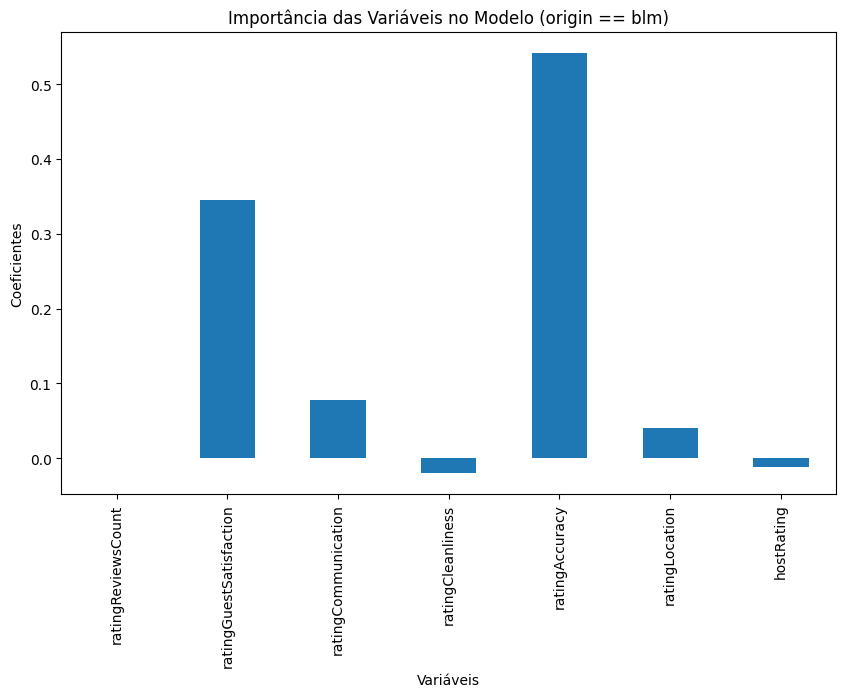

In [85]:
# Filtrar dados para origin == 'blm'
blm_data = database[database['origin'] == 'blm']

# Selecionar as colunas de caracter√≠sticas e a coluna alvo
X_blm = blm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_blm = blm_data.loc[X_blm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_blm = sm.add_constant(X_blm)

# Ajustar o modelo de regress√£o linear m√∫ltipla
model_blm = sm.OLS(y_blm, X_blm).fit()

# Exibir o resumo do modelo
print(model_blm.summary())

# Import√¢ncia das vari√°veis no modelo (gr√°fico de barras)
coefficients_blm = model_blm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_blm.plot(kind='bar')
plt.title('Import√¢ncia das Vari√°veis no Modelo (origin == blm)')
plt.xlabel('Vari√°veis')
plt.ylabel('Coeficientes')
plt.show()